In [108]:
%matplotlib inline
import numpy as np                  
import pandas as pd                 
import matplotlib.pyplot as plt     
import seaborn as sns
from matplotlib import rc
from datetime import datetime, date
import textwrap

In [109]:
df3 = pd.read_csv("D:/kuliah/SEMESTER 5/DATA ANALYS/pekerjaan_alumni.csv")
df3.head(5)

,NIM,Nama,Jenis Kelamin,TTL,Program Studi,Status Pekerjaan,Lama Mendapat Pekerjaan,Kesesuaian Pekerjaan,Gaji
0,60320,Irfan Taufik,Laki-Laki,5/15/1988,Ilmu Komputer,PNS,4.0,Tidak relevan,5000000.0
1,1200678,Dendi Handian,Laki-Laki,5/4/1994,Ilmu Komputer,Kontrak,19.0,Relevan,4500000.0
2,56665,Lusi luzaenah,Perempuan,9/12/1986,Ilmu Komputer,Honorer,2.0,Sangat relevan,2500000.0
3,1203524,Siswo Handoko,Laki-Laki,1/20/1994,Ilmu Komputer,Tetap,2.0,Kurang relevan,6000000.0
4,907018,Andiyangita Widiagani,Laki-Laki,7/29/1992,Ilmu Komputer,Belum bekerja,NaN,NaN,NaN


In [110]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NIM                      500 non-null    int64  
 1   Nama                     500 non-null    object 
 2   Jenis Kelamin            500 non-null    object 
 3   TTL                      500 non-null    object 
 4   Program Studi            500 non-null    object 
 5   Status Pekerjaan         500 non-null    object 
 6   Lama Mendapat Pekerjaan  400 non-null    float64
 7   Kesesuaian Pekerjaan     400 non-null    object 
 8   Gaji                     401 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 35.3+ KB


In [111]:
df3[(df3['Status Pekerjaan']=='Belum bekerja') & (df3['Gaji']>0)]

,NIM,Nama,Jenis Kelamin,TTL,Program Studi,Status Pekerjaan,Lama Mendapat Pekerjaan,Kesesuaian Pekerjaan,Gaji
242,1102600,Carwyn Peters,Laki-Laki,22/07/1993,Pendidikan Ilmu Komputer,Belum bekerja,NaN,NaN,1500000.0


In [112]:
df3.loc[(df3['Status Pekerjaan']=='Belum bekerja') & (df3['Gaji']>0), 'Gaji'] = np.nan

In [113]:
df3[(df3['Status Pekerjaan']=='Belum bekerja') & (df3['Gaji']>0)]

,NIM,Nama,Jenis Kelamin,TTL,Program Studi,Status Pekerjaan,Lama Mendapat Pekerjaan,Kesesuaian Pekerjaan,Gaji


In [115]:
df3.isnull().sum()

NIM                          0
Nama                         0
Jenis Kelamin                0
TTL                          0
Program Studi                0
Status Pekerjaan             0
Lama Mendapat Pekerjaan    100
Kesesuaian Pekerjaan       100
Gaji                       100
dtype: int64

In [116]:
duplikasi = df3[df3.duplicated("NIM")]
duplikasi

,NIM,Nama,Jenis Kelamin,TTL,Program Studi,Status Pekerjaan,Lama Mendapat Pekerjaan,Kesesuaian Pekerjaan,Gaji


#### Exploratory Data Analysis (EDA)

In [117]:
df3.describe(include="all")

,NIM,Nama,Jenis Kelamin,TTL,Program Studi,Status Pekerjaan,Lama Mendapat Pekerjaan,Kesesuaian Pekerjaan,Gaji
count,5.000000e+02,500,500,500,500,500,400.000000,400,4.000000e+02
unique,NaN,500,2,467,2,5,NaN,4,NaN
top,NaN,Griff Harrell,Laki-Laki,13/04/1987,Ilmu Komputer,PNS,NaN,Relevan,NaN
freq,NaN,1,279,2,273,111,NaN,112,NaN
mean,7.810690e+05,NaN,NaN,NaN,NaN,NaN,12.502500,NaN,4.165000e+06
std,4.149812e+05,NaN,NaN,NaN,NaN,NaN,7.108186,NaN,1.868892e+06
min,5.133900e+04,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000e+06
25%,4.558738e+05,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,2.500000e+06
50%,7.507275e+05,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,4.500000e+06
75%,1.137108e+06,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,6.000000e+06


In [123]:
df3.rename(columns = {'Status Pekerjaan':'Status_Pekerjaan', 'Kesesuaian Pekerjaan':'Kesesuaian_Pekerjaan'}, inplace = True)

### Jumlah Alumni berdasarkan Status Pekerjaan

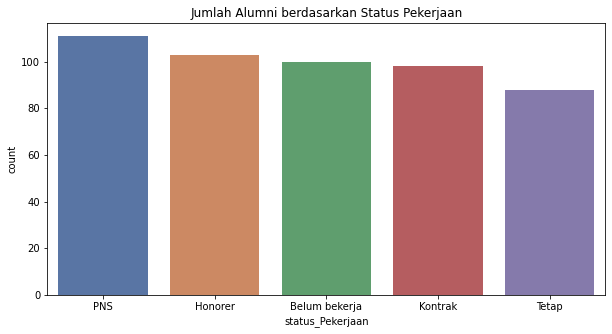

In [149]:
plt.figure(figsize=(10, 5))
fig = sns.countplot(x="status_Pekerjaan", data=df3, order = df3['status_Pekerjaan'].value_counts().index, palette="deep")
plt.title("Jumlah Alumni berdasarkan Status Pekerjaan")
plt.show(fig)

Dari Data diatas, kita dapat dengan mudah melihat bahwa status pekerjaan PNS yang paling mendominasi dari jumlah keseluruhan alumni. Kemudian diikuti dengan status pekerjaan honorer, belum bekerja, kontrak dan tetap.

### Jumlah Status Pekerjaan Alumni Berdasarkan Program Studi

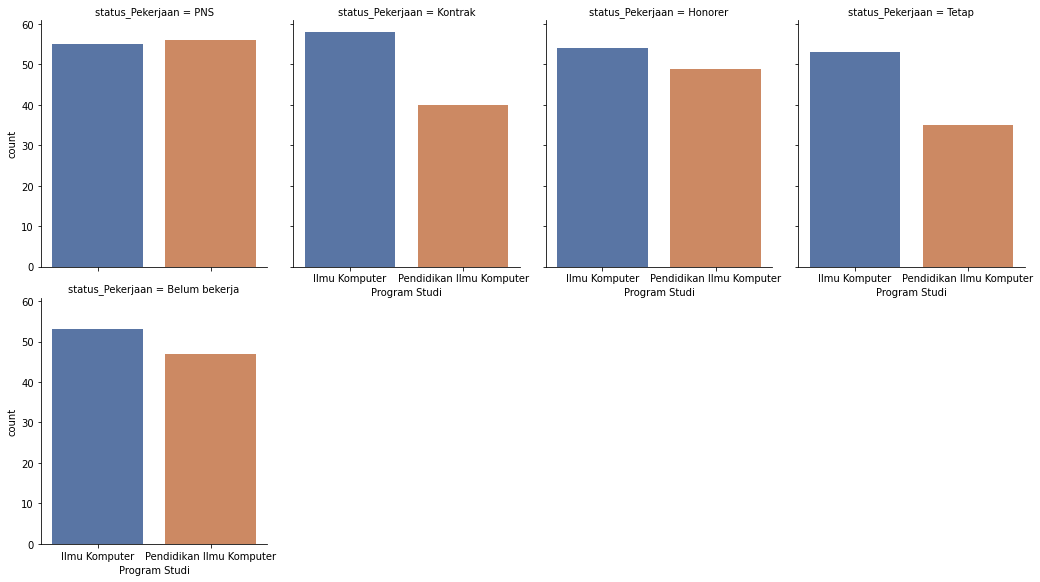

In [167]:
g = sns.catplot(x="Program Studi", col="status_Pekerjaan", col_wrap=4,
                data=df3[df3.status_Pekerjaan.notnull() ],
                kind="count", palette="deep", height=4, aspect=.9)

Dari data diatas, dapat dilihat bahwa alumni yang berstatus pekerjaan PNS meniliki jumlah alumni yang hampir seimbang berdasarkan program studinya. Berbeda dengan orang yang berstatus pekerjaan tetap dan kontrak yang memiliki selisih cukup jauh untuk jumlah alumni pada masing masing program studinya.

### Jumlah Alumni berdasarkan Kesesuaian Pekerjaan

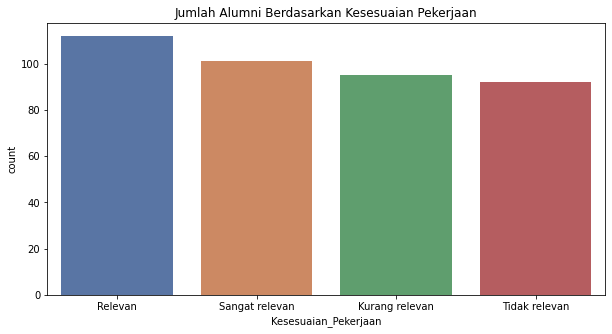

In [156]:
plt.figure(figsize=(10, 5))
fig = sns.countplot(x="Kesesuaian_Pekerjaan", data=df3, order = df3['Kesesuaian_Pekerjaan'].value_counts().index, palette="deep")
plt.title("Jumlah Alumni Berdasarkan Kesesuaian Pekerjaan")
plt.show(fig)

Dari data diatas, menunjukan bahwa kebanyakan alumni memiliki pekerjaan yang relevan atau sesuai dengan program studinya. 

### Jumlah Kesesuaian Pekerjaan Alumni Berdasarkan Program Studi

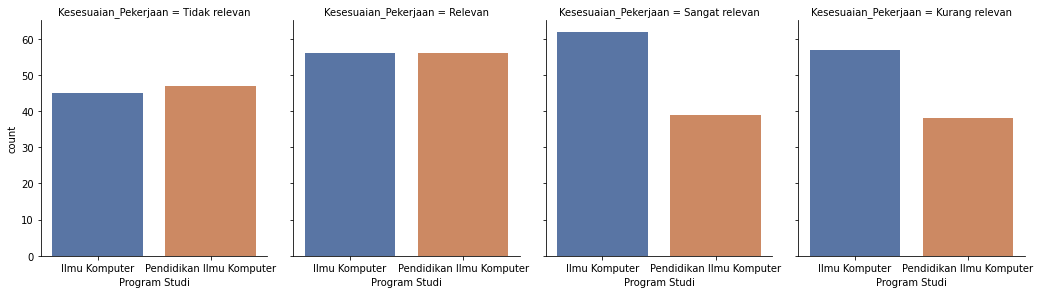

In [168]:
g = sns.catplot(x="Program Studi", col="Kesesuaian_Pekerjaan", col_wrap=4,
                data=df3[df3.status_Pekerjaan.notnull()],
                kind="count", height=4, aspect=.9, palette="deep")

Dari data diatas menunjukan bahwa jumlah alumni berdasarkan program studi yang pekerjaanya relevan memiliki jumlah yang sama atau seimbang

### Distribusi Gaji Alumni dan Lama Mendapat Pekerjaan Berdasarkan Status Pekerjaan

Text(0.5, 1.0, 'Distribusi Gaji Alumni Berdasarkan Status Pekerjaan')

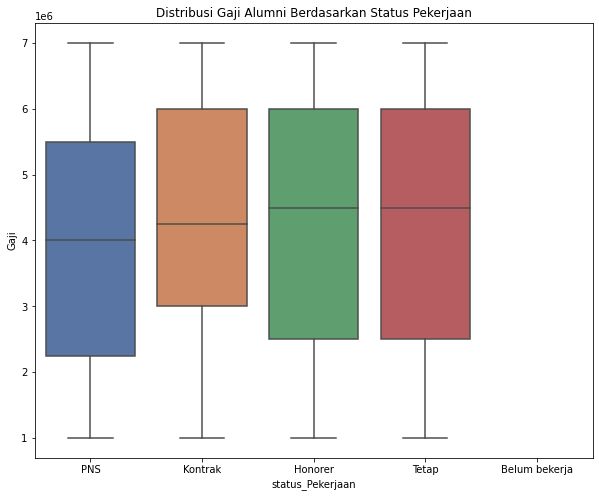

In [148]:
plt.figure(figsize=(10, 8))

df3_Gaji_ls = df3.groupby('status_Pekerjaan')["Gaji"].mean().reset_index()
df3_Gaji_ls = df3_Gaji_ls.sort_values(by="Gaji", ascending=False)

sns.boxplot(data=df3, palette="deep", y="Gaji", x="status_Pekerjaan")
plt.title("Distribusi Gaji Alumni Berdasarkan Status Pekerjaan")

Text(0.5, 1.0, 'Distribusi Lama Mendapat Pekerjaan Alumni Berdasarkan Status Pekerjaan')

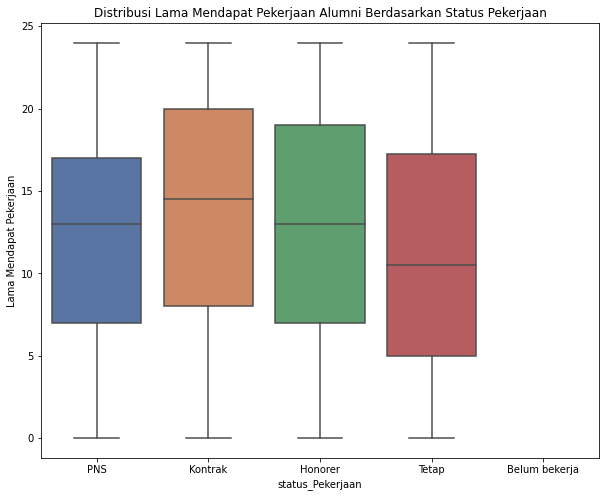

In [146]:
plt.figure(figsize=(10, 8))

df3_Gaji_ls = df3.groupby('status_Pekerjaan')["Lama Mendapat Pekerjaan"].mean().reset_index()
df3_Gaji_ls = df3_Gaji_ls.sort_values(by="Lama Mendapat Pekerjaan", ascending=False)

sns.boxplot(data=df3, palette="deep", y="Lama Mendapat Pekerjaan", x="status_Pekerjaan")
plt.title("Distribusi Lama Mendapat Pekerjaan Alumni Berdasarkan Status Pekerjaan")

Data di atas menunjukkan distribusi gaji berdasarkan status pekerjaan dan distribusi lama mendapat pekerjaan berdasarkan status pekerjaan. Dapat ketahui bahwa alumni dengan status pekerjaan kontrak memiliki rata-rata gaji yang lebih tinggi dibanding status pekerjaan lainnya. Namun, memiliki rata-rata waktu menganggur paling lama dibandingkan status pekerjaan lainnya.

### Rata-Rata Gaji Alumni dan Lama Mendapat Pekerjaan Berdasarkan Status Pekerjaan

In [140]:
df3_group_one = df3[['status_Pekerjaan', 'Gaji']]

In [141]:
df3_group_one = df3_group_one.groupby(['status_Pekerjaan'],as_index=False).mean()

df3_group_one

,status_Pekerjaan,Gaji
0,Belum bekerja,NaN
1,Honorer,4.155340e+06
2,Kontrak,4.362245e+06
3,PNS,3.936937e+06
4,Tetap,4.244318e+06


Dari data diatas, dapat dilihat bahwa status pekerjaan kontrak memiliki rata-rata gaji lebih tinggi dibanding dengan yang lainnya

In [ ]:
Rata-Rata Gaji Alumni Berdasarkan Status Pekerjaan

In [143]:
df3_group_two = df3[['status_Pekerjaan', 'Lama Mendapat Pekerjaan']]

In [144]:
df3_group_two = df3_group_two.groupby(['status_Pekerjaan'],as_index=False).mean()

df3_group_two

,status_Pekerjaan,Lama Mendapat Pekerjaan
0,Belum bekerja,NaN
1,Honorer,12.728155
2,Kontrak,13.857143
3,PNS,12.117117
4,Tetap,11.215909


Dari data diatas, dapat dilihat bahwa status pekerjaan kontrak memiliki rata-rata menganggur setelah lulus sekitar 13 bulan